In [27]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from joblib import dump, load

In [28]:
data_train_df = pd.read_csv('./sales_train.csv') 
data_train_df['item_id'] = data_train_df['item_id'].astype(str)

In [29]:
data_train_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


In [30]:
# Assuming your data is in df
id_vars = ['item_id','store_id']
value_vars = [col for col in data_train_df.columns if col.startswith('d_')]

melted_df = data_train_df.melt(id_vars=id_vars, value_vars=value_vars, var_name='day', value_name='value')


In [31]:
melted_df.head()

,item_id,store_id,day,value
0,HOBBIES_1_001,CA_1,d_1,0
1,HOBBIES_1_002,CA_1,d_1,0
2,HOBBIES_1_003,CA_1,d_1,0
3,HOBBIES_1_004,CA_1,d_1,0
4,HOBBIES_1_005,CA_1,d_1,0


In [32]:
len(melted_df)

46985090

In [33]:
data_price_df = pd.read_csv('./items_weekly_sell_prices.csv') 
data_price_df.head()
data_price_df['item_id'] = data_price_df['item_id'].astype(str)

In [34]:
calendar_data = pd.read_csv('./calendar.csv')
calendar_data.head()
len(calendar_data)

1969

In [35]:
train_data = pd.merge(melted_df,calendar_data, left_on='day', right_on='d', how='left')
columns_to_drop = ['d', 'day']
train_data = train_data.drop(columns=columns_to_drop)
train_data.head()

len(train_data)
train_data.head()

# Create label encoders for categorical columns
label_encoders = {}
categorical_cols = ['item_id', 'store_id']
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le
    
# Encode categorical variables using label encoding for prices data
categorical_cols_sp = ['item_id', 'store_id']
for col in categorical_cols_sp:
    le = label_encoders[col]
    data_price_df[col] = le.transform(data_price_df[col])


In [36]:
data_price_df

,store_id,item_id,wm_yr_wk,sell_price
0,0,1437,11325,9.58
1,0,1437,11326,9.58
2,0,1437,11327,8.26
3,0,1437,11328,8.26
4,0,1437,11329,8.26
...,...,...,...,...
6841116,9,1436,11617,1.00
6841117,9,1436,11618,1.00
6841118,9,1436,11619,1.00
6841119,9,1436,11620,1.00


In [37]:
train_data

,item_id,store_id,value,date,wm_yr_wk
0,1437,0,0,2011-01-29,11101
1,1438,0,0,2011-01-29,11101
2,1439,0,0,2011-01-29,11101
3,1440,0,0,2011-01-29,11101
4,1441,0,0,2011-01-29,11101
...,...,...,...,...,...
46985085,1432,9,2,2015-04-18,11512
46985086,1433,9,0,2015-04-18,11512
46985087,1434,9,0,2015-04-18,11512
46985088,1435,9,0,2015-04-18,11512


In [38]:
# train_data_price = pd.merge(train_date,data_price_df, left_on='wm_yr_wk', right_on='wm_yr_wk', how='left')
# train_data_price.head()
right_join = pd.merge(train_data,data_price_df, left_on=['store_id','item_id','wm_yr_wk'], right_on=['store_id','item_id','wm_yr_wk'], how='right')
right_join

,item_id,store_id,value,date,wm_yr_wk,sell_price
0,1437,0,0.0,2013-07-13,11325,9.58
1,1437,0,0.0,2013-07-14,11325,9.58
2,1437,0,0.0,2013-07-15,11325,9.58
3,1437,0,0.0,2013-07-16,11325,9.58
4,1437,0,0.0,2013-07-17,11325,9.58
...,...,...,...,...,...,...
36575940,1436,9,NaN,NaN,11617,1.00
36575941,1436,9,NaN,NaN,11618,1.00
36575942,1436,9,NaN,NaN,11619,1.00
36575943,1436,9,NaN,NaN,11620,1.00


In [39]:
df_cleaned = right_join.dropna(subset=['value'])
df_cleaned

,item_id,store_id,value,date,wm_yr_wk,sell_price
0,1437,0,0.0,2013-07-13,11325,9.58
1,1437,0,0.0,2013-07-14,11325,9.58
2,1437,0,0.0,2013-07-15,11325,9.58
3,1437,0,0.0,2013-07-16,11325,9.58
4,1437,0,0.0,2013-07-17,11325,9.58
...,...,...,...,...,...,...
36575879,1436,9,3.0,2015-04-14,11511,1.00
36575880,1436,9,0.0,2015-04-15,11511,1.00
36575881,1436,9,4.0,2015-04-16,11511,1.00
36575882,1436,9,0.0,2015-04-17,11511,1.00


In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34720691 entries, 0 to 36575883
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item_id     int32  
 1   store_id    int32  
 2   value       float64
 3   date        object 
 4   wm_yr_wk    int64  
 5   sell_price  float64
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 1.6+ GB


In [41]:
df_cleaned['cya_target'] = df_cleaned['value'] * df_cleaned['sell_price']

#############################
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%Y-%m-%d')
############################
print(df_cleaned)

C:\Users\anika\AppData\Local\Temp\ipykernel_12624\3292497163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cya_target'] = df_cleaned['value'] * df_cleaned['sell_price']


          item_id  store_id  value       date  wm_yr_wk  sell_price  \
0            1437         0    0.0 2013-07-13     11325        9.58   
1            1437         0    0.0 2013-07-14     11325        9.58   
2            1437         0    0.0 2013-07-15     11325        9.58   
3            1437         0    0.0 2013-07-16     11325        9.58   
4            1437         0    0.0 2013-07-17     11325        9.58   
...           ...       ...    ...        ...       ...         ...   
36575879     1436         9    3.0 2015-04-14     11511        1.00   
36575880     1436         9    0.0 2015-04-15     11511        1.00   
36575881     1436         9    4.0 2015-04-16     11511        1.00   
36575882     1436         9    0.0 2015-04-17     11511        1.00   
36575883     1436         9    3.0 2015-04-18     11512        1.00   

          cya_target  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...      

C:\Users\anika\AppData\Local\Temp\ipykernel_12624\3292497163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%Y-%m-%d')


In [42]:
numerical_cols_int = ['item_id', 'store_id']
for col in numerical_cols_int:
    df_cleaned.loc[:, col] = df_cleaned[col].astype('int64')


C:\Users\anika\AppData\Local\Temp\ipykernel_12624\1161475497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, col] = df_cleaned[col].astype('int64')


In [43]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34720691 entries, 0 to 36575883
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   item_id     int64         
 1   store_id    int64         
 2   value       float64       
 3   date        datetime64[ns]
 4   wm_yr_wk    int64         
 5   sell_price  float64       
 6   cya_target  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 2.1 GB


In [44]:
df_cleaned.head()

,item_id,store_id,value,date,wm_yr_wk,sell_price,cya_target
0,1437,0,0.0,2013-07-13,11325,9.58,0.0
1,1437,0,0.0,2013-07-14,11325,9.58,0.0
2,1437,0,0.0,2013-07-15,11325,9.58,0.0
3,1437,0,0.0,2013-07-16,11325,9.58,0.0
4,1437,0,0.0,2013-07-17,11325,9.58,0.0


In [45]:
summed_values = df_cleaned.groupby('date')['cya_target'].sum().reset_index()
print(summed_values)

           date  cya_target
0    2011-01-29    81650.61
1    2011-01-30    78970.57
2    2011-01-31    57706.91
3    2011-02-01    60761.20
4    2011-02-02    46959.95
...         ...         ...
1536 2015-04-14   102896.92
1537 2015-04-15   106913.88
1538 2015-04-16    98373.49
1539 2015-04-17   103030.58
1540 2015-04-18   132625.89

[1541 rows x 2 columns]


In [46]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the SARIMA model
model = sm.tsa.statespace.SARIMAX(summed_values['cya_target'], 
                                  order=(1, 1, 1), 
                                  seasonal_order=(1, 1, 1, 12), 
                                  enforce_stationarity=False, 
                                  enforce_invertibility=False)

# Fit the model
results = model.fit()


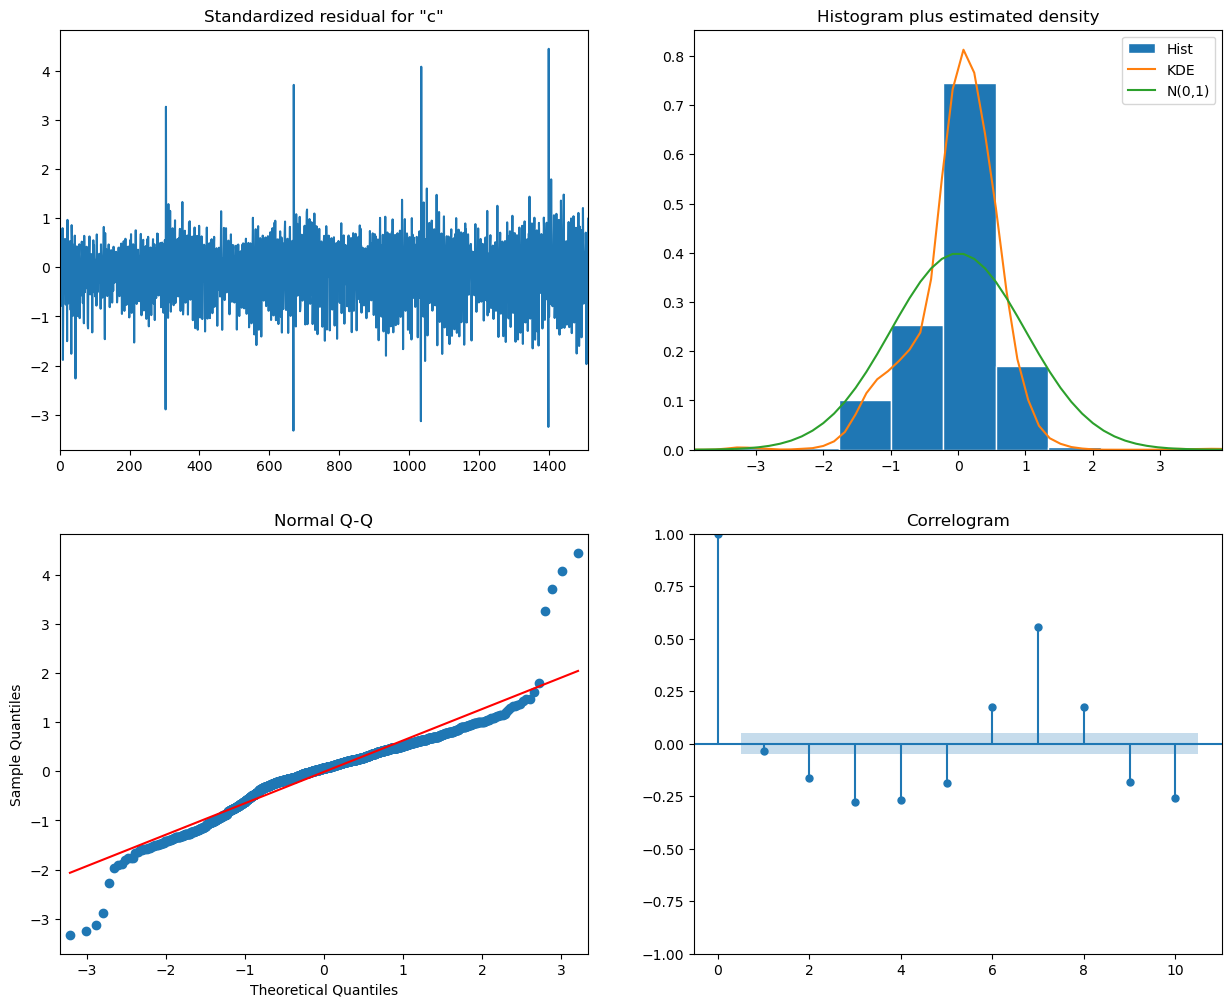

In [47]:
results.plot_diagnostics(figsize=(15,12))
plt.show()


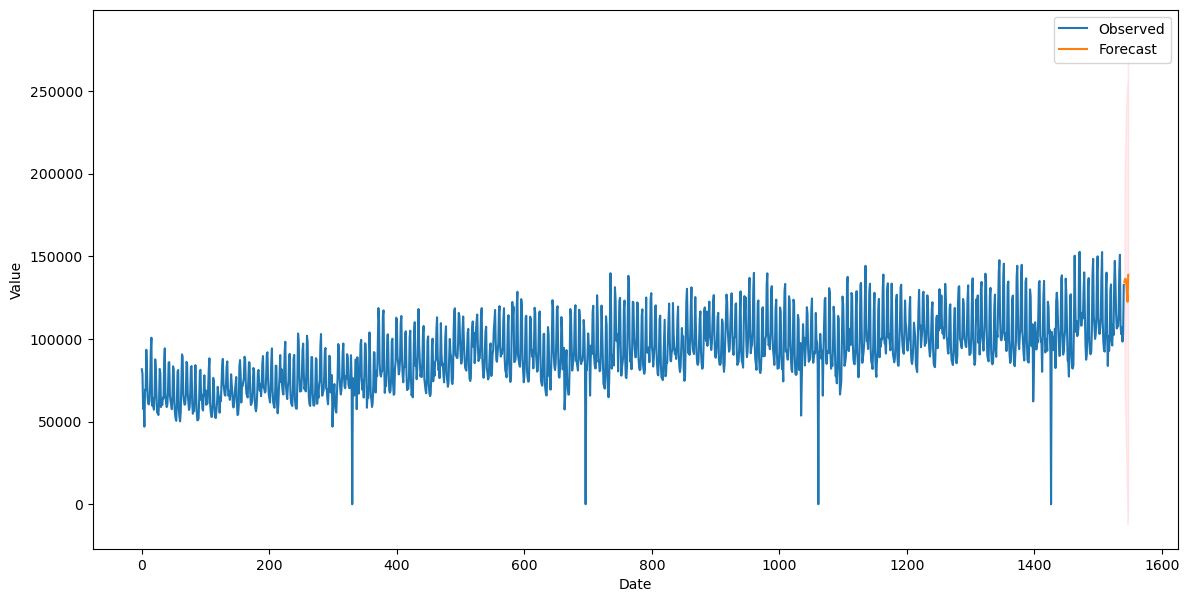

In [48]:
# Forecast the next 12 periods
forecast = results.get_forecast(steps=7)

# Get 95% confidence intervals of forecasts
pred_ci = forecast.conf_int()

ax = summed_values['cya_target'].plot(label='Observed', figsize=(14, 7))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()
plt.show()


In [49]:
# Get the forecasted values (predicted mean)
forecasted_values = forecast.predicted_mean
print(forecasted_values)


1541    134289.891161
1542    136163.739810
1543    136382.402057
1544    133803.730975
1545    128319.763994
1546    122466.646768
1547    138783.681144
Name: predicted_mean, dtype: float64


In [50]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the SARIMA model
model = sm.tsa.statespace.SARIMAX(summed_values['cya_target'], 
                                  order=(1, 1, 1), 
                                  seasonal_order=(1, 1, 1, 12), 
                                  enforce_stationarity=False, 
                                  enforce_invertibility=False)

# Fit the model
results = model.fit()

In [53]:
dump(results, 'fc_best_model.joblib')

['fc_best_model.joblib']

In [55]:
def forecast_total_revenue(input_date):

    model_fit = load('fc_best_model.joblib')
    
    # Create a date range for the next 7 days
    start_date = '2015-04-18'
    forecast_start_date = input_date
    forecast_end_date = input_date + pd.DateOffset(days=6)
    forecast_dates = pd.date_range(start_date, forecast_end_date)
    
    total_revenue = 0  # Initialize total revenue
    count = len(forecast_dates)

    # Forecast revenue for the current day
    forecast = model_fit.get_forecast(steps=count)
    forecasted_value = forecast.predicted_mean
    # Add the forecasted value to total revenue
    total_revenue =forecasted_value.tail(7).sum()

    return total_revenue

In [57]:
input_date = pd.to_datetime('2020-2-10', format='%Y-%m-%d')  # Replace with your desired input date
total_revenue = forecast_total_revenue(input_date)

# Print the total forecasted revenue
print(total_revenue)

2783299.200680185
